In [22]:
from fastbook import * 

In [23]:
urls = search_images_ddg('bird',max_images=1)
len(urls),urls[0]

(1,
 'https://i.pinimg.com/originals/99/c6/90/99c690acd1d1010b9ffb600ce5becf15.jpg')

In [24]:
dest = Path('bird.png')
if not dest.exists():
    download_url(urls[0],dest,show_progress=False)

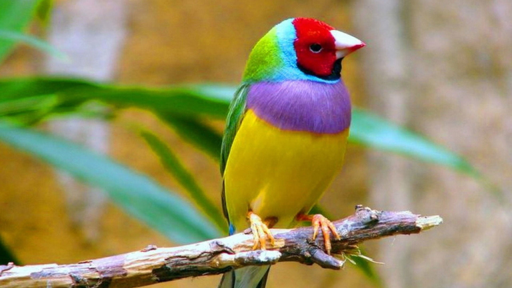

In [25]:
im = Image.open(dest)
im.to_thumb(512,512)

In [26]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
  parent = (path)
  parent.mkdir(exist_ok=True)
  for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [27]:
path.ls()

(#2) [Path('bird_or_not/bird'),Path('bird_or_not/forest')]

In [28]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

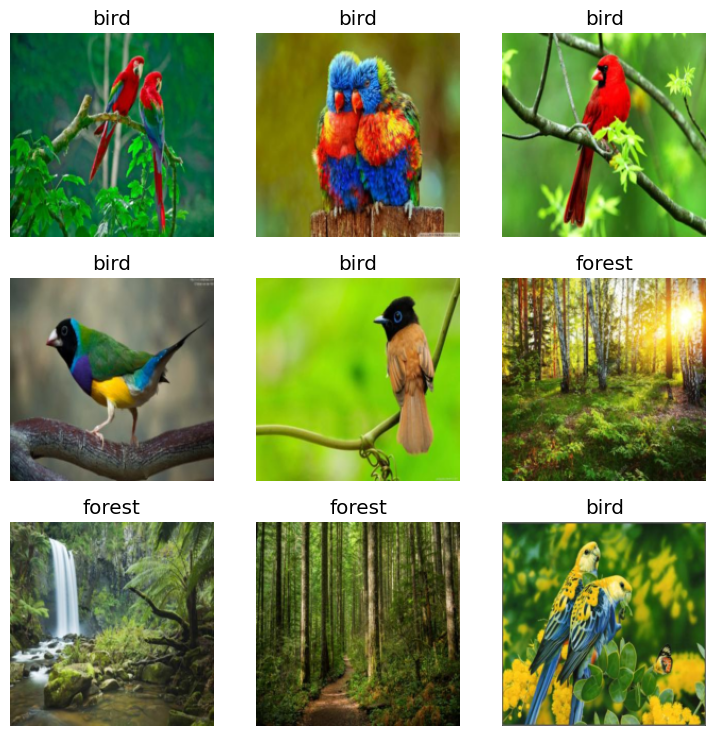

In [29]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=45),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=9,nrows=3)

In [30]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.070579,0.987860,0.301887,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.263335,0.130535,0.037736,00:11
1,0.204164,0.166182,0.037736,00:11
2,0.175663,0.201417,0.037736,00:11
3,0.148247,0.213667,0.037736,00:11


In [31]:
is_bird,_,probs = learn.predict(PILImage.create('bird.png'))
print(f"This is a :{is_bird}.")
print(f"Probability it's a bird is {probs[0]:2f}")

This is a :bird.
Probability it's a bird is 0.999912
